## Refraction of a focused (gaussian) beam passing through a coverslip

Parameters:
* beam incidence angle $\Theta = 45^0$
* beam  $NA = n_{immersion}Sin(\alpha)$    
* coordinate system 2D: x - horizontal (along the glass surface), y - vertical
* coordinate origin $(x_0,y_0)$: waist of beam in immersion media without refraction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
n_sampleArray = [1.33, 1.37, 1.47] #water: 1.33; life worm: 1.37; fixed and mounted in ProLong Gold: 1.47
n_sample = n_sampleArray[0]
# n= 1.37 @ 633 nm is C.elegans RI, ref: https://www.ncbi.nlm.nih.gov/pubmed/17694065/
n_glass = 1.5230 #@589 nm, D263M borosilicate glass for coverslips, from Fischer Scientific datasheet
thickness_glass = 170. #microns, No1.5 standard glass
thickness_media = 250. #um, immersion media thickness until some dummy surface, for ray plotting

n_immersionArray = np.array([1.0, 1.3325, 1.4722, 1.515]) #air, water, glycerol, immersion oil
n_immersion = n_immersionArray[1]
immersionLabel = ['air','water','glycerol', 'oil']

thetaDeg = 45.0 #incidence angle of ray axis, relative to coverslip normal vector
thetaRad = thetaDeg/180*np.pi
thetaRadArray = np.linspace(thetaDeg-40,thetaDeg+40,11)/180.0*np.pi #ray angle of the beam, in radians

In [4]:
# ray tracing, beware of coordinate definition
def ray_tracing(x0,y0,theta0,n0,n1, thickness_n1):
    #rays incident at angle theta0 refract from n0 to n1 media and change angle from theta0 to theta1    
    sinTheta1 = n0/n1 * np.sin(theta0)
    tanTheta1 = sinTheta1/(np.sqrt(1.0-sinTheta1**2))
    x1 = x0 + thickness_n1*np.tan(sinTheta1)
    y1 = y0 + thickness_n1
    return (x1,y1,np.arcsin(sinTheta1))

In [8]:
# rays start from here, for plotting purposes
x_incident = -300
#coordinates where actual ray hit the first surface:
x0, y0, theta0 = -thickness_glass*np.tan(thetaRad), -thickness_glass, thetaRad
#Two refractions occur here:
(x1,y1,theta1) = ray_tracing(x0, y0, theta0, n_immersion,n_glass,thickness_glass)
(x2,y2,theta2) = ray_tracing(x1, y1, theta1, n_glass,n_sample, 150.0)

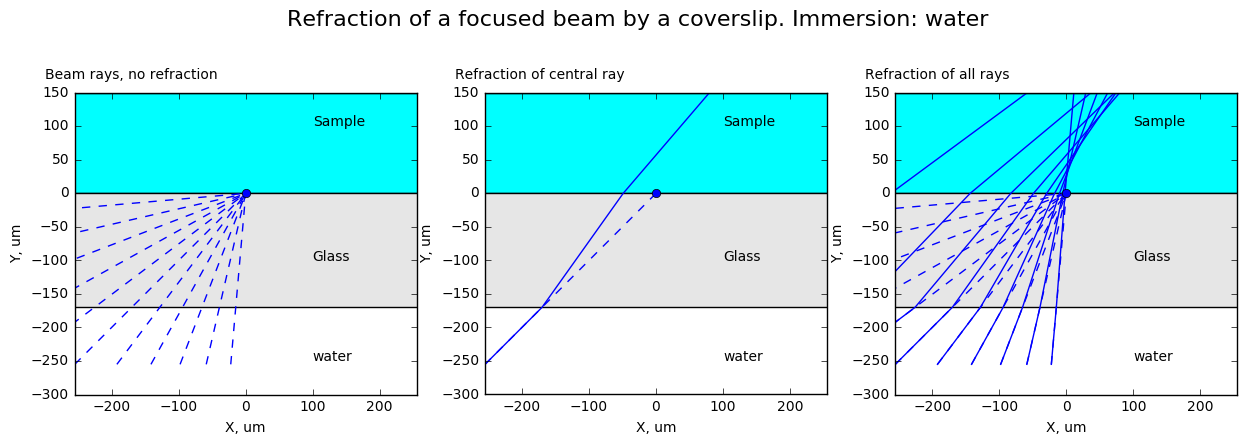

In [13]:
i_mmersion = 1
n_immersion = n_immersionArray[i_mmersion]
#plot the rays
fig, ax = plt.subplots(1,3, figsize = (5*3, 5*1))

fig.suptitle('Refraction of a focused beam by a coverslip. Immersion: ' + immersionLabel[i_mmersion], fontsize=16)
for i in range(3):
    ax[i].bar(x_incident,150,-2*x_incident,0,color = 'cyan')
    ax[i].bar(x_incident,thickness_glass,-2*x_incident,-thickness_glass,color = [0.9, 0.9, 0.9])

#plot the fan ray of the beam, if there were no glass or sample
x_startArray = - 1.5*thickness_glass*np.tan(thetaRadArray)
y_startArray = - 1.5*thickness_glass*np.ones(len(x_startArray))

for i in range(len(x_startArray)):
    ax[0].plot([x_startArray[i],0],[y_startArray[i],0],'--b')


#plot the central ray with refraction
#point where ray starts:
x_start, y_start = - 1.5*thickness_glass*np.tan(thetaRad), - 1.5*thickness_glass
#point where ray enters the glass:
x0, y0, theta0 = -thickness_glass*np.tan(thetaRad), -thickness_glass, thetaRad
#Two refractions occur:
(x1,y1,theta1) = ray_tracing(x0, y0, theta0, n_immersion,n_glass,thickness_glass)
(x2,y2,theta2) = ray_tracing(x1, y1, theta1, n_glass,n_sample, 150.0)

ax[1].plot([x_start,0],[y_start,0],'--b')
ax[1].plot([x_start,x0,x1,x2],[y_start,y0,y1,y2])

#plot all rays with refraction
for i in range(len(thetaRadArray)):
    x0i, y0i, theta0i = -thickness_glass*np.tan(thetaRadArray[i]), -thickness_glass, thetaRadArray[i]
    (x1i,y1i,theta1i) = ray_tracing(x0i, y0i, theta0i, n_immersion,n_glass,thickness_glass)
    (x2i,y2i,theta2i) = ray_tracing(x1i, y1i, theta1i, n_glass,n_sample, 150.0)
    ax[2].plot([x_startArray[i],0],[y_startArray[i],0],'--b')
    ax[2].plot([x_startArray[i],x0i,x1i,x2i],[y_startArray[i],y0i,y1i,y2i],'-b')
    
#make it neat
for i in range(3):
    ax[i].plot(0,0,'bo')
    ax[i].set_xlim([x_start,-x_start])
    ax[i].set_ylim([-300,150])
    ax[i].set_aspect('equal', 'box')
    ax[i].text(100,100,'Sample')
    ax[i].text(100,-100,'Glass')
    ax[i].text(100,-250,immersionLabel[i_mmersion])
    ax[i].set_xlabel('X, um')
    ax[i].set_ylabel('Y, um')


ax[0].text(x_incident, 170, 'Beam rays, no refraction')
ax[1].text(x_incident, 170, 'Refraction of central ray')
ax[2].text(x_incident, 170, 'Refraction of all rays')

C:\Users\nvladim\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: invalid value encountered in sqrt
C:\Users\nvladim\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: RuntimeWarning: invalid value encountered in arcsin


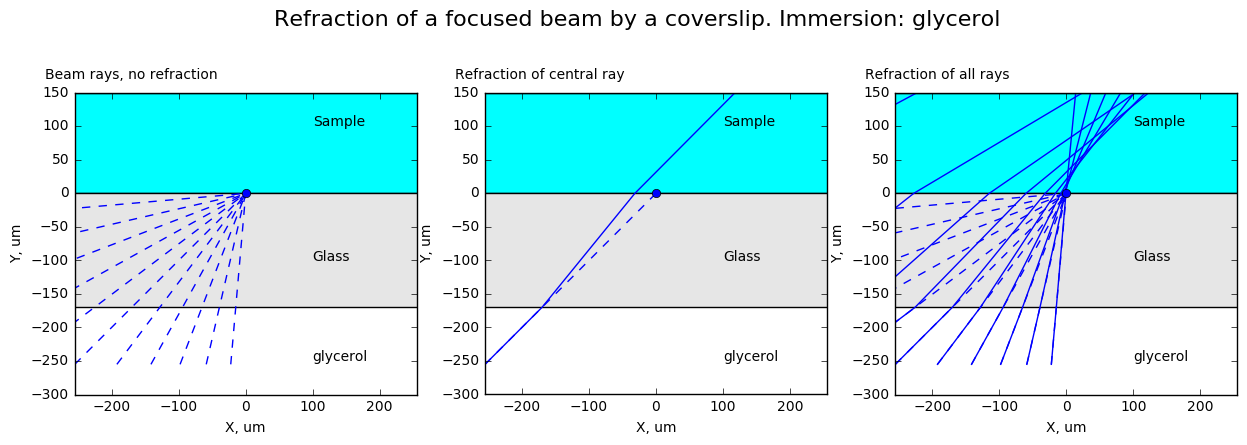

In [14]:
i_mmersion = 2
n_immersion = n_immersionArray[i_mmersion]
#plot the rays
fig, ax = plt.subplots(1,3, figsize = (5*3, 5*1))

fig.suptitle('Refraction of a focused beam by a coverslip. Immersion: ' + immersionLabel[i_mmersion], fontsize=16)
for i in range(3):
    ax[i].bar(x_incident,150,-2*x_incident,0,color = 'cyan')
    ax[i].bar(x_incident,thickness_glass,-2*x_incident,-thickness_glass,color = [0.9, 0.9, 0.9])

#plot the fan ray of the beam, if there were no glass or sample
x_startArray = - 1.5*thickness_glass*np.tan(thetaRadArray)
y_startArray = - 1.5*thickness_glass*np.ones(len(x_startArray))

for i in range(len(x_startArray)):
    ax[0].plot([x_startArray[i],0],[y_startArray[i],0],'--b')


#plot the central ray with refraction
#point where ray starts:
x_start, y_start = - 1.5*thickness_glass*np.tan(thetaRad), - 1.5*thickness_glass
#point where ray enters the glass:
x0, y0, theta0 = -thickness_glass*np.tan(thetaRad), -thickness_glass, thetaRad
#Two refractions occur:
(x1,y1,theta1) = ray_tracing(x0, y0, theta0, n_immersion,n_glass,thickness_glass)
(x2,y2,theta2) = ray_tracing(x1, y1, theta1, n_glass,n_sample, 150.0)

ax[1].plot([x_start,0],[y_start,0],'--b')
ax[1].plot([x_start,x0,x1,x2],[y_start,y0,y1,y2])

#plot all rays with refraction
for i in range(len(thetaRadArray)):
    x0i, y0i, theta0i = -thickness_glass*np.tan(thetaRadArray[i]), -thickness_glass, thetaRadArray[i]
    (x1i,y1i,theta1i) = ray_tracing(x0i, y0i, theta0i, n_immersion,n_glass,thickness_glass)
    (x2i,y2i,theta2i) = ray_tracing(x1i, y1i, theta1i, n_glass,n_sample, 150.0)
    ax[2].plot([x_startArray[i],0],[y_startArray[i],0],'--b')
    ax[2].plot([x_startArray[i],x0i,x1i,x2i],[y_startArray[i],y0i,y1i,y2i],'-b')
    
#make it neat
for i in range(3):
    ax[i].plot(0,0,'bo')
    ax[i].set_xlim([x_start,-x_start])
    ax[i].set_ylim([-300,150])
    ax[i].set_aspect('equal', 'box')
    ax[i].text(100,100,'Sample')
    ax[i].text(100,-100,'Glass')
    ax[i].text(100,-250,immersionLabel[i_mmersion])
    ax[i].set_xlabel('X, um')
    ax[i].set_ylabel('Y, um')


ax[0].text(x_incident, 170, 'Beam rays, no refraction')
ax[1].text(x_incident, 170, 'Refraction of central ray')
ax[2].text(x_incident, 170, 'Refraction of all rays')

C:\Users\nvladim\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: invalid value encountered in sqrt
C:\Users\nvladim\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: RuntimeWarning: invalid value encountered in arcsin


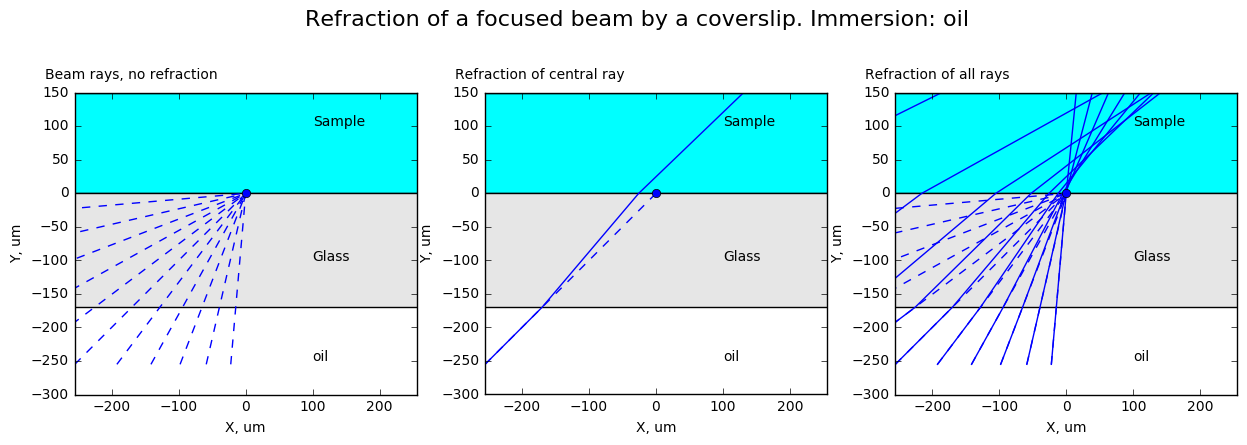

In [15]:
i_mmersion = 3
n_immersion = n_immersionArray[i_mmersion]
#plot the rays
fig, ax = plt.subplots(1,3, figsize = (5*3, 5*1))

fig.suptitle('Refraction of a focused beam by a coverslip. Immersion: ' + immersionLabel[i_mmersion], fontsize=16)
for i in range(3):
    ax[i].bar(x_incident,150,-2*x_incident,0,color = 'cyan')
    ax[i].bar(x_incident,thickness_glass,-2*x_incident,-thickness_glass,color = [0.9, 0.9, 0.9])

#plot the fan ray of the beam, if there were no glass or sample
x_startArray = - 1.5*thickness_glass*np.tan(thetaRadArray)
y_startArray = - 1.5*thickness_glass*np.ones(len(x_startArray))

for i in range(len(x_startArray)):
    ax[0].plot([x_startArray[i],0],[y_startArray[i],0],'--b')


#plot the central ray with refraction
#point where ray starts:
x_start, y_start = - 1.5*thickness_glass*np.tan(thetaRad), - 1.5*thickness_glass
#point where ray enters the glass:
x0, y0, theta0 = -thickness_glass*np.tan(thetaRad), -thickness_glass, thetaRad
#Two refractions occur:
(x1,y1,theta1) = ray_tracing(x0, y0, theta0, n_immersion,n_glass,thickness_glass)
(x2,y2,theta2) = ray_tracing(x1, y1, theta1, n_glass,n_sample, 150.0)

ax[1].plot([x_start,0],[y_start,0],'--b')
ax[1].plot([x_start,x0,x1,x2],[y_start,y0,y1,y2])

#plot all rays with refraction
for i in range(len(thetaRadArray)):
    x0i, y0i, theta0i = -thickness_glass*np.tan(thetaRadArray[i]), -thickness_glass, thetaRadArray[i]
    (x1i,y1i,theta1i) = ray_tracing(x0i, y0i, theta0i, n_immersion,n_glass,thickness_glass)
    (x2i,y2i,theta2i) = ray_tracing(x1i, y1i, theta1i, n_glass,n_sample, 150.0)
    ax[2].plot([x_startArray[i],0],[y_startArray[i],0],'--b')
    ax[2].plot([x_startArray[i],x0i,x1i,x2i],[y_startArray[i],y0i,y1i,y2i],'-b')
    
#make it neat
for i in range(3):
    ax[i].plot(0,0,'bo')
    ax[i].set_xlim([x_start,-x_start])
    ax[i].set_ylim([-300,150])
    ax[i].set_aspect('equal', 'box')
    ax[i].text(100,100,'Sample')
    ax[i].text(100,-100,'Glass')
    ax[i].text(100,-250,immersionLabel[i_mmersion])
    ax[i].set_xlabel('X, um')
    ax[i].set_ylabel('Y, um')


ax[0].text(x_incident, 170, 'Beam rays, no refraction')
ax[1].text(x_incident, 170, 'Refraction of central ray')
ax[2].text(x_incident, 170, 'Refraction of all rays')

## Focus the incident beam on the first glass surface

In [17]:
#coordinates where ray hit the first surface:
x0, y0, theta0 = 0, -thickness_glass, thetaRad
#Two refractions occur here:
(x1,y1,theta1) = ray_tracing(x0, y0, theta0, n_immersion,n_glass,thickness_glass)
(x2,y2,theta2) = ray_tracing(x1, y1, theta1, n_glass,n_sample, 150.0)

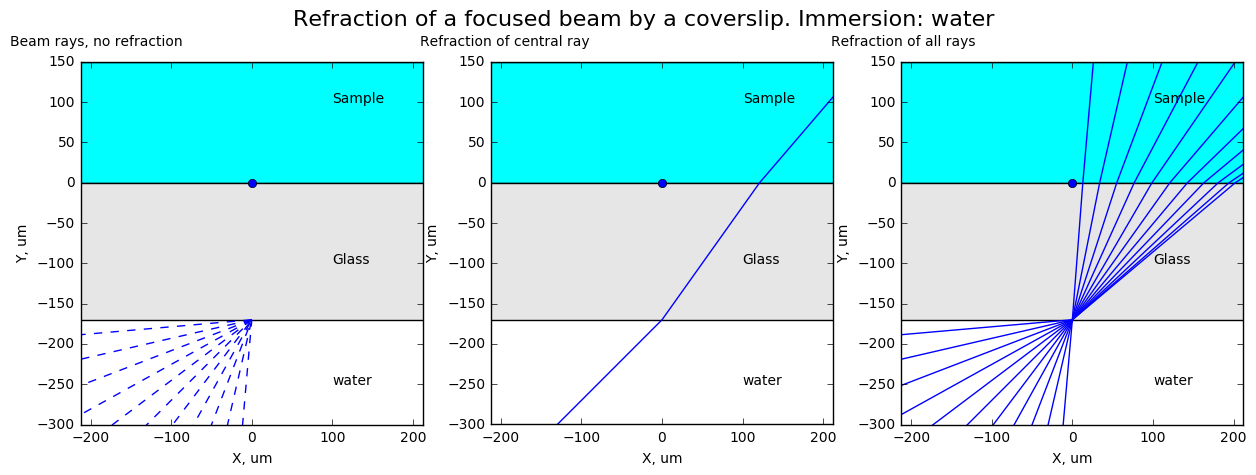

In [26]:
fan_radius = 300 #um, for plotting purposes

i_mmersion = 1
n_immersion = n_immersionArray[i_mmersion]
#plot the rays
fig, ax = plt.subplots(1,3, figsize = (5*3, 5*1))

fig.suptitle('Refraction of a focused beam by a coverslip. Immersion: ' + immersionLabel[i_mmersion], fontsize=16)
for i in range(3):
    ax[i].bar(x_incident,150,-2*x_incident,0,color = 'cyan')
    ax[i].bar(x_incident,thickness_glass,-2*x_incident,-thickness_glass,color = [0.9, 0.9, 0.9])

#NO glass or sample, water propagation
x_startArray = - fan_radius*np.cos(thetaRadArray)
y_startArray = - fan_radius*np.sin(thetaRadArray) - thickness_glass

for i in range(len(x_startArray)):
    ax[0].plot([x_startArray[i],0],[y_startArray[i],-thickness_glass],'--b')

    
#the CENTRAL ray with refraction
#point where ray starts:
x_start, y_start = - fan_radius*np.cos(thetaRad), - fan_radius*np.sin(thetaRad) - thickness_glass
#point where ray enters the glass:
x0, y0, theta0 = 0, -thickness_glass, thetaRad
#Two refractions occur:
(x1,y1,theta1) = ray_tracing(x0, y0, theta0, n_immersion,n_glass,thickness_glass)
(x2,y2,theta2) = ray_tracing(x1, y1, theta1, n_glass,n_sample, 150.0)

ax[1].plot([x_start,x0,x1,x2],[y_start,y0,y1,y2])

#ALL rays with refraction
for i in range(len(thetaRadArray)):
    x0i, y0i, theta0i = 0, -thickness_glass, thetaRadArray[i]
    (x1i,y1i,theta1i) = ray_tracing(x0i, y0i, theta0i, n_immersion,n_glass,thickness_glass)
    (x2i,y2i,theta2i) = ray_tracing(x1i, y1i, theta1i, n_glass,n_sample, 150.0)
    ax[2].plot([x_startArray[i],x0i,x1i,x2i],[y_startArray[i],y0i,y1i,y2i],'-b')
    
#make it neat
for i in range(3):
    ax[i].plot(0,0,'bo')
    ax[i].set_xlim([x_start,-x_start])
    ax[i].set_ylim([-300,150])
    ax[i].set_aspect('equal', 'box')
    ax[i].text(100,100,'Sample')
    ax[i].text(100,-100,'Glass')
    ax[i].text(100,-250,immersionLabel[i_mmersion])
    ax[i].set_xlabel('X, um')
    ax[i].set_ylabel('Y, um')


ax[0].text(x_incident, 170, 'Beam rays, no refraction')
ax[1].text(x_incident, 170, 'Refraction of central ray')
ax[2].text(x_incident, 170, 'Refraction of all rays')